A comparison between the initial behaviours of the original and the new implementation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax

import slimpletic as st

assert jax.config.read('jax_enable_x64')

Here we setup the parameters for the system.

In [2]:
# System parameters, used in both methods
m = 1.0
k = 100.0
ll = 1e-4 * np.sqrt(m * k)  # ll is $\lambda$ in the paper

# Simulation and Method parameters
dt = 0.1 * np.sqrt(m / k)
t_sample_count = 1000
tmax = t_sample_count * np.sqrt(m / k)
t0 = 0
t = t0 + dt * np.arange(0, t_sample_count + 1)
r = 0

# Initial conditions
q0 = [1.]
pi0 = [0.25 * dt * k]

Now the system dynamics

In [3]:
def lagrangian_f(q, qdot, t):
    return 0.5 * m * jnp.dot(qdot, qdot) - 0.5 * k * jnp.dot(q, q)

In [4]:
def create_original():
    from sympy import Symbol
    from original import slimplectic

    dho = slimplectic.GalerkinGaussLobatto('t', ['q'], ['v'])
    L = 0.5 * m * np.dot(dho.v, dho.v) - 0.5 * k * np.dot(dho.q, dho.q)
    # DHO:
    K = -ll * np.dot(dho.vp, dho.qm)
    # No damping:
    K_nd = Symbol('a')
    dho.discretize(L, K_nd, r, method='implicit', verbose=False)
    return dho


dho = create_original()

In [5]:
"""
We need to normalise the format of the results to compare them and be able to plot them nicely.
"""


def format_original(original_results):
    return np.vstack([
        np.array(original_results[0]),
        np.array(original_results[1])
    ]).T


def format_jax(jax_results):
    return np.vstack(
        [
            np.array(jax_results[0]),
            np.array(jax_results[1])
        ],
    ).T

## Original Implementation

In [6]:
*original_results, integrate_debug_escape_info = dho.integrate(q0, pi0, t)
original_results_fmt = format_original(original_results)
original_results_fmt

pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-100.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [1.0, 0.9975, 0.25000000000000006, 0.0, 0.010000000000000002]
pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-100.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [0.9975, 0.9850250000000002, -0.7487499999999948, 0.010000000000000002, 0.010000000000000002]
pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-100.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [0.9850250000000002, 0.9626997500000003, -1.74001249999999, 0.020000000000000004, 0.010000000000000002]
pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-100.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} 

array([[ 1.        ,  0.25      ],
       [ 0.9975    , -0.74875   ],
       [ 0.985025  , -1.7400125 ],
       ...,
       [ 0.7557488 ,  6.5452016 ],
       [ 0.81742207,  5.75861617],
       [ 0.87092112,  4.91444457]])

## JAX Implementation

In [7]:
from slimpletic import Solver

solver = Solver(r=r, dt=dt, lagrangian=lagrangian_f)

jax_results = solver.integrate(jnp.array(q0), jnp.array(pi0), t0, t_sample_count)

qi_values [[1.00124998]
 [0.99874373]]
pi_current [0.25] pi_next [-0.74999686]
qi_values [[1.0049905 ]
 [0.99246558]]
pi_current [-0.74999686] pi_next [-1.7487249]
qi_values [[1.00369023]
 [0.98118453]]
pi_current [-1.7487249] pi_next [-2.74116227]
qi_values [[0.9973431 ]
 [0.96494476]]
pi_current [-2.74116227] pi_next [-3.7223062]
qi_values [[0.98596839]
 [0.94381548]]
pi_current [-3.7223062] pi_next [-4.68719813]
qi_values [[0.96961069]
 [0.91789065]]
pi_current [-4.68719813] pi_next [-5.6309488]
qi_values [[0.94833974]
 [0.88728855]]
pi_current [-5.6309488] pi_next [-6.54876295]
qi_values [[0.92225015]
 [0.85215127]]
pi_current [-6.54876295] pi_next [-7.43596366]
qi_values [[0.89146097]
 [0.81264403]]
pi_current [-7.43596366] pi_next [-8.28801617]
qi_values [[0.85611518]
 [0.76895444]]
pi_current [-8.28801617] pi_next [-9.10055097]
qi_values [[0.81637898]
 [0.72129158]]
pi_current [-9.10055097] pi_next [-9.86938625]
qi_values [[0.7724411 ]
 [0.66988503]]
pi_current [-9.86938625] pi_

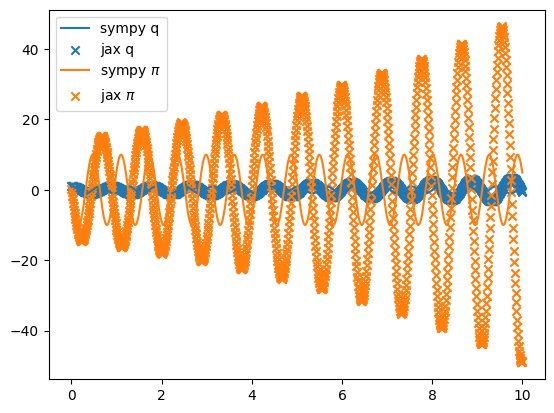

In [8]:
plt.plot(t, original_results_fmt[:, 0], label='sympy q', color='C0')
plt.scatter(t, jax_results[0].reshape(1, -1), label='jax q', color='C0', marker='x')
plt.plot(t, original_results_fmt[:, 1], label='sympy $\pi$', color='C1', )
plt.scatter(t, jax_results[1].reshape(1, -1), label='jax $\pi$', color='C1', marker='x')
plt.legend()